# Ejercicio Python de Regresión Logística
Realizaremos un ejercicio de prueba para comprender como funciona este algoritmo

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Cargamos los datos de entrada del archivo csv

In [41]:
dataframe = pd.read_csv("data/usuarios_win_mac_lin.csv")
dataframe

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2
...,...,...,...,...,...
165,13.0,1,7,42,0
166,12.0,1,2,6,0
167,13.0,1,3,9,0
168,13.0,1,7,28,0


In [5]:
dataframe = pd.read_csv("data/usuarios_win_mac_lin.csv")

clases = {
    0: 'Windows',
    1: 'Linux',
    2: 'Mac'
}
# Esto se pone porque se necesita que todos los datos sean numericos porque las letras no las entiende

dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [7]:
dataframe['clase'].value_counts(normalize=True) # El normalize true te lo da en %

clase
0    0.505882
2    0.258824
1    0.235294
Name: proportion, dtype: float64

In [8]:
dataframe.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


- La media de clase no tendría sentido por ejemplo
- La media y la mediana tienen que parecerse sino no es distrubucion normal

In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duracion  170 non-null    float64
 1   paginas   170 non-null    int64  
 2   acciones  170 non-null    int64  
 3   valor     170 non-null    int64  
 4   clase     170 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 6.8 KB


In [10]:
print(dataframe.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


## Visualizamos los datos

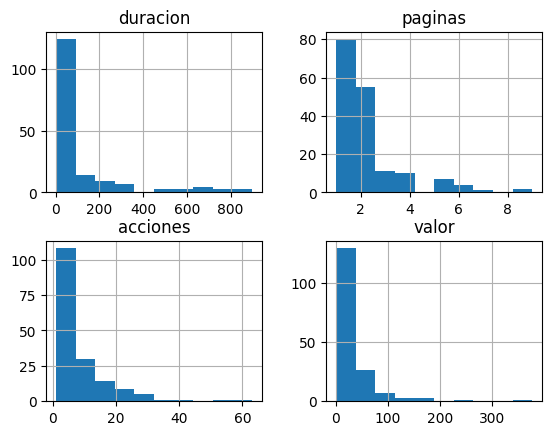

In [12]:
dataframe.drop(columns=['clase']).hist()
plt.show()

- Los datos no son normales
- La regresión logística busca la media
- Las predicciones de estos datos son peligrosas porque los logaritmos apuntan a la mediana pero como no tiene una distribución normal fallaría mucho

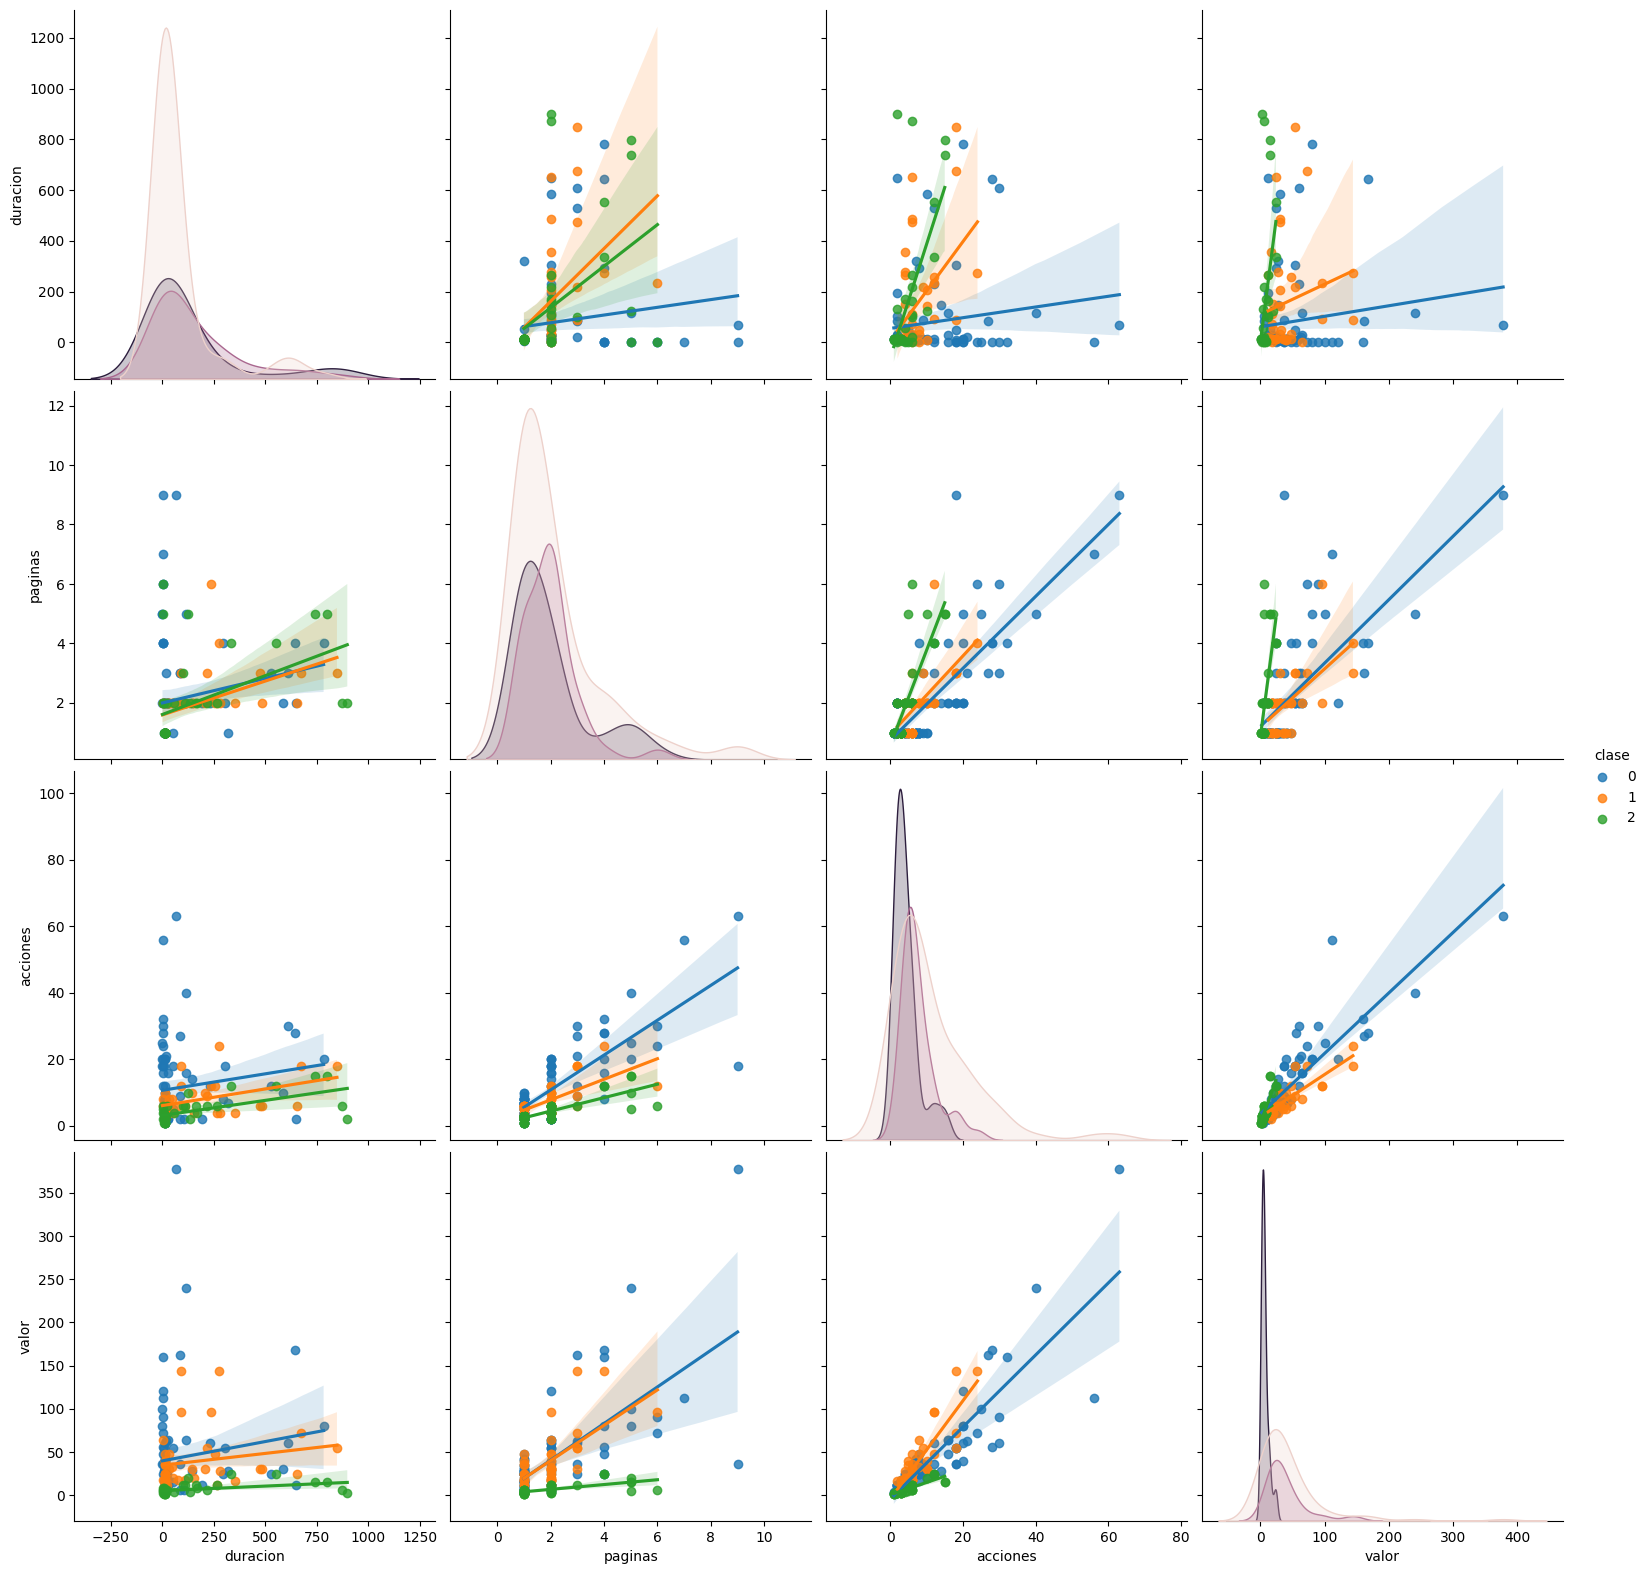

In [13]:
sns.pairplot(dataframe.dropna(),
            hue='clase', # Para que lo separe por clase
            height=4,
            vars=["duracion", "paginas","acciones","valor"],
            kind='reg'); # que muestre:"reg" de regresión lineal

## Creamos el modelo

In [14]:
X = np.array(dataframe.drop(columns=['clase'])) # La x es todo menos la clase
y = np.array(dataframe['clase']) # La y es la clase

In [16]:
from sklearn.linear_model import LogisticRegression
# La regresion logistica es muy buena para clasificar colunas de 2 o 3 valores (binarias generalmente)

In [19]:
# Modelo instanciado
model = LogisticRegression(max_iter=2000) # El max_iter te hace las interacciones que quieras y QUITA EL WARNING DE PREDICCIÓN MENOS PRECISA

# Modelo entrenado
model.fit(X, y) #Cuanto mayor sea el iter mas prediccion tendra pero hay que tener cuidado con el over trained

LogisticRegression(max_iter=2000)

In [22]:
# Esto predice lo del propio modelo (que no tiene mucho sentido pero bueno, vemos que funciona)
predictions = model.predict(X)
print(predictions)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 2 2
 2 2 2 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 2 0
 0 1 1 1 0 0 0 0 0 0 0 0 2 1 0 0 0 0 1 0 0 2 0 2 1 0 0 0 0 0 0 0 0 0 0 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0]


In [23]:
predicions_proba = model.predict_proba(X)
print(np.round(np.array(predicions_proba), 2))

[[0.22 0.09 0.69]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.18 0.08 0.74]
 [0.28 0.1  0.62]
 [0.27 0.08 0.65]
 [0.05 0.05 0.91]
 [0.22 0.09 0.69]
 [0.09 0.06 0.84]
 [0.   0.   1.  ]
 [0.12 0.07 0.8 ]
 [0.32 0.09 0.59]
 [0.1  0.06 0.84]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.23 0.09 0.68]
 [0.   0.   1.  ]
 [0.65 0.34 0.01]
 [0.58 0.42 0.  ]
 [0.73 0.27 0.  ]
 [0.71 0.29 0.  ]
 [0.32 0.68 0.  ]
 [0.82 0.18 0.  ]
 [0.46 0.54 0.  ]
 [0.78 0.22 0.  ]
 [0.37 0.63 0.  ]
 [0.09 0.91 0.  ]
 [0.72 0.28 0.  ]
 [0.45 0.52 0.03]
 [0.5  0.5  0.  ]
 [0.35 0.65 0.  ]
 [0.22 0.78 0.  ]
 [0.26 0.74 0.  ]
 [0.22 0.78 0.  ]
 [0.64 0.36 0.  ]
 [0.01 0.   0.99]
 [0.03 0.02 0.95]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.81 0.19 0.  ]
 [0.61 0.39 0.  ]
 [0.54 0.46 0.  ]
 [0.23 0.77 0.  ]
 [0.68 0.32 0.  ]
 [0.28 0.72 0.  ]
 [0.57 0.43 0.  ]
 [0.41 0.59 0.  ]
 [0.76 0.24 0.  ]
 [0.99 0.01 0.  ]
 [0.77 0.23 0.  ]
 [0.78 0.22 0.  ]
 [0.97 0.03 0.  ]
 [0.99 0.01 0.  ]
 [0.91 0.09 0.  ]
 [0.98 0.0

- Donde sale 0. 0. 1. es porque sabe al 100% que seria el numero 2 es decir, mac

In [24]:
# Esto es lo que predice, en este caso 77% que sería una mala predicción
model.score(X, y)

0.7764705882352941

In [25]:
model.classes_

array([0, 1, 2])

# Adicional: Validación del Modelo

In [26]:
validation_size = 0.20  # Validación del 20%
seed = 7 # Semilla solamente para que nos salgan a todos igual
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,
                                                                    y,
                                                                    test_size=validation_size,
                                                                    random_state=seed)

In [27]:
# name='Logistic Regression'
# kfold = model_selection.KFold(n_splits=10) #Parte los datos en 10 trozos para usar validación cruzada / cross validation
# cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')

# msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
# print(cv_results)
# print(msg)

In [28]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=2000)

In [30]:
predictions = model.predict(X_test) # x test datos que él no ha visto
print(accuracy_score(Y_test, predictions)) # que tan bien predice mi modelo (sin que se lo haya memorizado porque los x_text no los habia visto antes)

0.8529411764705882


In [31]:
acierto = accuracy_score(Y_test, predictions)

error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")

Acierto: 85.29 %
Error: 14.71 %


## Reporte de Resultados

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [33]:
c_matrix = confusion_matrix(Y_test, predictions) # Los reales contra los que predije

In [34]:
print(c_matrix) # Matriz de confusión

[[16  0  2]
 [ 3  3  0]
 [ 0  0 10]]


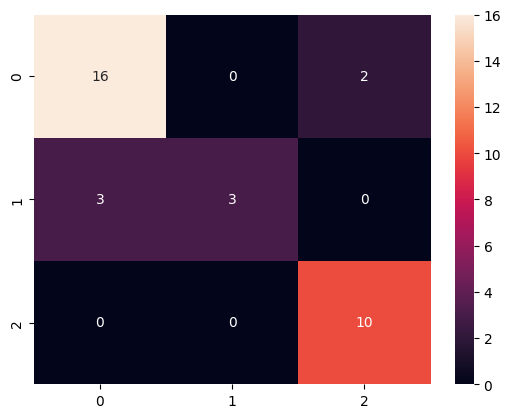

In [35]:
# mostramos de manera visual la matriz de confusión
import seaborn as sns
sns.heatmap(c_matrix, annot=True);

In [31]:
29/34

0.8529411764705882

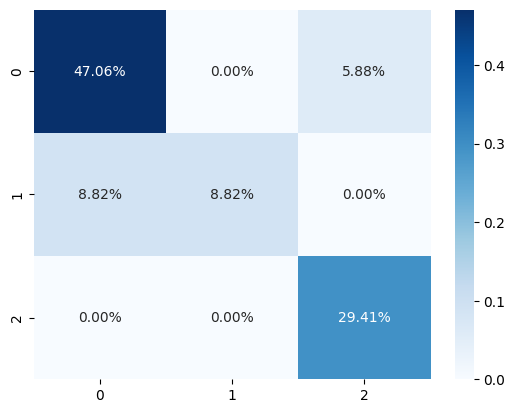

In [36]:
sns.heatmap(c_matrix/np.sum(c_matrix), annot=True, 
            fmt='.2%', cmap='Blues');

In [38]:
from sklearn.metrics import multilabel_confusion_matrix, precision_score, recall_score, f1_score
# Todos por separado, solo windows, solo linux y solo mac
multilabel_confusion_matrix(Y_test, predictions)

array([[[13,  3],
        [ 2, 16]],

       [[28,  0],
        [ 3,  3]],

       [[22,  2],
        [ 0, 10]]])

[Nice confusion matrix catalog visuals examples](https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea)

# Clasificación de nuevos registros

In [39]:
X_new = pd.DataFrame({'duracion': [8],
                     'paginas': [5],
                     'acciones': [5],
                     'valor': [2]})
model.predict(X_new)

c:\Users\nuria\AppData\Local\pypoetry\Cache\virtualenvs\bootcamp-ds-NHz2zIBL-py3.10\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([2])

In [40]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       1.00      0.50      0.67         6
           2       0.83      1.00      0.91        10

    accuracy                           0.85        34
   macro avg       0.89      0.80      0.81        34
weighted avg       0.87      0.85      0.84        34

